## Exemple inicial de càrrega de dades i avaluació de models

En aquest exemple usarem una base de dades de càncer de pit per tal de fer classificació amb k-NN. L'objectiu és veure com es carreguen les dades, com es pot fer una visualització simple, com s'aplica el classificador kNN, com s'obtenen alguns indicadors bàsics de rendiment i les conseqüències de no analitzar les dades prèviament.

Inicialment carregarem les funcions i paquets que usarem durant aquest codi

In [141]:
# funcions i paquets per a visualitzacio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# paquet per a manipulacio de dades
import pandas as pd

# funcions i paquets per a carregar datasets especifics (exemples simples)
from sklearn import datasets

# funcions per a processat de dades
from sklearn.preprocessing import StandardScaler
# funcions per a partició de dades
from sklearn.model_selection import train_test_split
# funcions per a classificacio kNN
from sklearn.neighbors import KNeighborsClassifier
# funcions per a metriques de rendiment
from sklearn.metrics import accuracy_score,  precision_score, recall_score, roc_curve,roc_auc_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve

#funcions per a la validació creuada
from sklearn.model_selection import cross_val_score

Llegim la base de dades d'exemple. La lectura de cada dataset serà particular i dependrà de la font. Usualment tindrem una matriu $X$ amb les característiques, un vector $y$ amb la classe o valor de cada cas i alguna variable on tinguem el nom de cada característica.
Usualment això s'encapsula en algun tipus de classe. 

In [142]:
# import some data to play with
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: {cancer.feature_names}')

tamany de les dades: (569, 30)
Caracteristiques: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


En una primera visualització mostrem la distribució de les dues primeres variables.

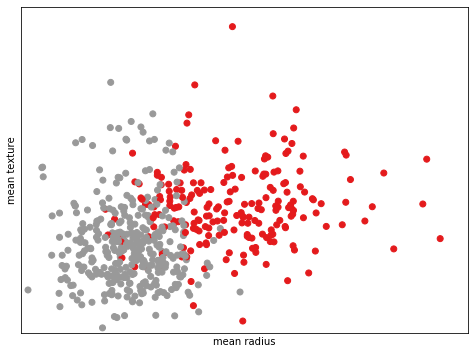

In [143]:
x_min, x_max = X[:, 0].min()*.95, X[:, 0].max() *1.05
y_min, y_max = X[:, 1].min()*0.95, X[:, 1].max() *1.05


plt.ion()
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='face')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Abans de fer qualsevol entrenament cal dividir, com a mínim, el conjunt de dades en dos parts, **entrenament** i **test**. La llibreria sklearn ens proporciona eines per fer-ho més fàcil i ens dona les dades ja barrejades i estratificades (si volem).  
Consulteu [`split_train_test`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [144]:
#trenquem el conjunt en 55% training i 45% test
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

Ara ja podem entrenar un classificador, en el nostre cas el kNN. Aquest entrenament el fem amb les dades seleccionades per a training.

In [145]:
#apliquem knn
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

El següent pas és aplicar el classificador sobre dades no vistes en l'entrenament. Podeu provar de canviar el parametre K (n_neighbors) i veure si canvia res en els propers passos.

In [146]:
predictions = model.predict(x_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

Ens retorna 0 i 1 indicant quina classe li assigna a cada un dels casos de la matriu x_test (cada fila correspon a un cas). Però no sabem com de bo és el nostre model. Cal aplicar les *mètriques de rendiment*.

Accuracy:0.9571984435797666
Precision:0.975609756097561
Recall:0.9580838323353293


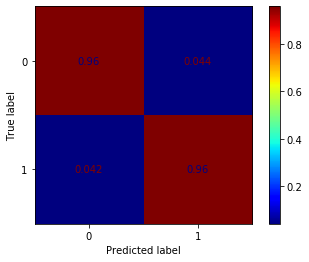

In [147]:
#metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
conf_mat = confusion_matrix(y_test, predictions).T

print(f'Accuracy:{acc}')
print(f'Precision:{prec}')
print(f'Recall:{rec}')
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='jet')


## Rang de les dades
És fonamental tenir present que les dades poden representar coses molt diferents. En el nostre exemple el rang és 'similar' per a totes les característiques però no sol ser el cas.

Si forcem la segona característica a tenir un rang 1000 vegades superior al de les altres ....

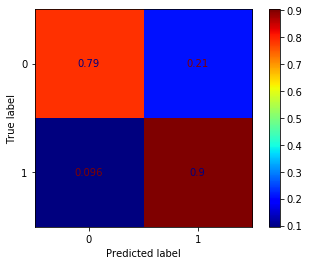

In [148]:
X = cancer.data
X[:,1] = X[:,1]*1000
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

model.fit(x_train,y_train)
predictions = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='jet')

El rendiment ha baixat significativament degut a que hem posat el major pes en una sola variable. Si observem com interactuen les diferents variables entre elles no veurem res estrany si no parem atenció (en aquest exemple només es mostren les primeres 4 variables)

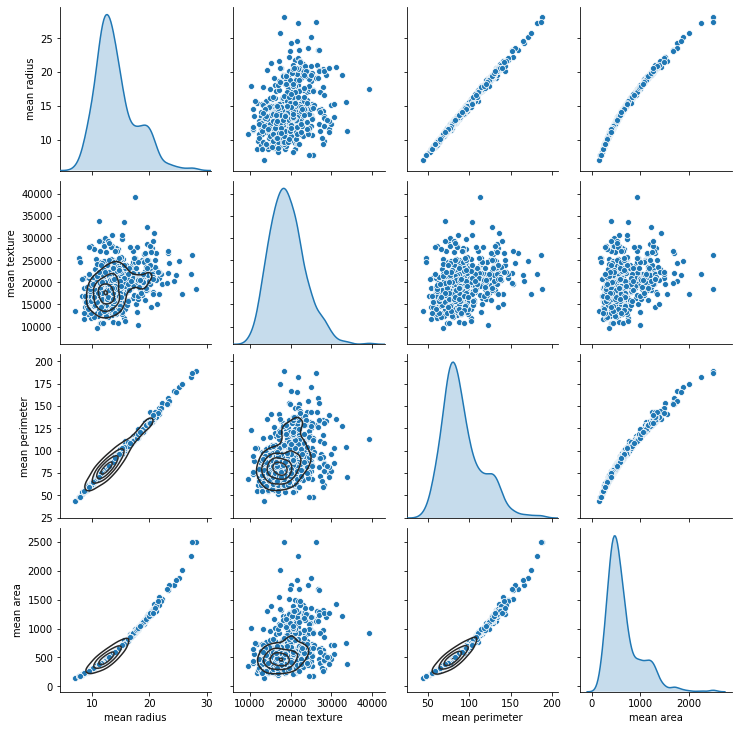

In [149]:
df = pd.DataFrame(X[:,:4], columns=cancer.feature_names[:4])
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

La 'trampa' està en com visualitzem les dades. Mirant només la interacció entre la 1a i la 2a  ...

Text(0, 0.5, 'mean texture')

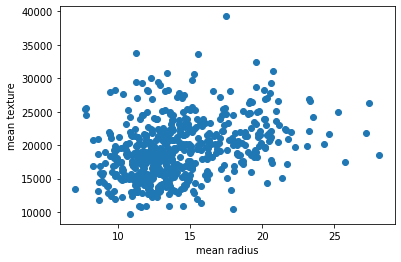

In [150]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])

Veiem que les dades estan prou ben distribuïdes, però els eixos tenen significats diferents. 1cm en l'eix horizontal són 1000 unitats de diferència mentre que en el vertical en són 0.5 unitats. Per arreglar-ho, forcem al sistema que ho representi de la mateixa manera ...

(5.914693369175627, 29.17630663082437, 8231.484823399556, 40758.515176600435)

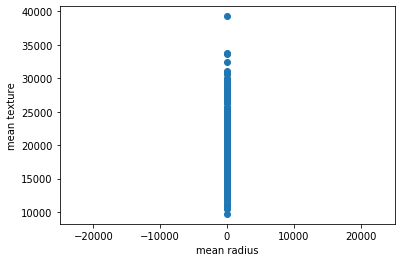

In [151]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.axis('equal')

Veiem que les variacions en la segona característica ja no tenen cap significat. Per arreglar-ho cal aplicar la normalització de les dades. És a dir, substreure la mitjana i dividir per la desviació estandard. Per sort, sklearn ens proporciona les eines. 

Consulteu [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

(-2.3395517323366706, 4.281191074896022, -2.588481987258973, 5.011122455859778)

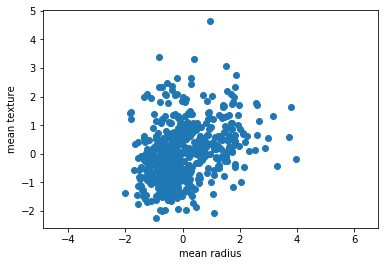

In [152]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.axis('equal')

Hem perdut els rangs originals, però ara les dues característiques tenen la mateixa importància.

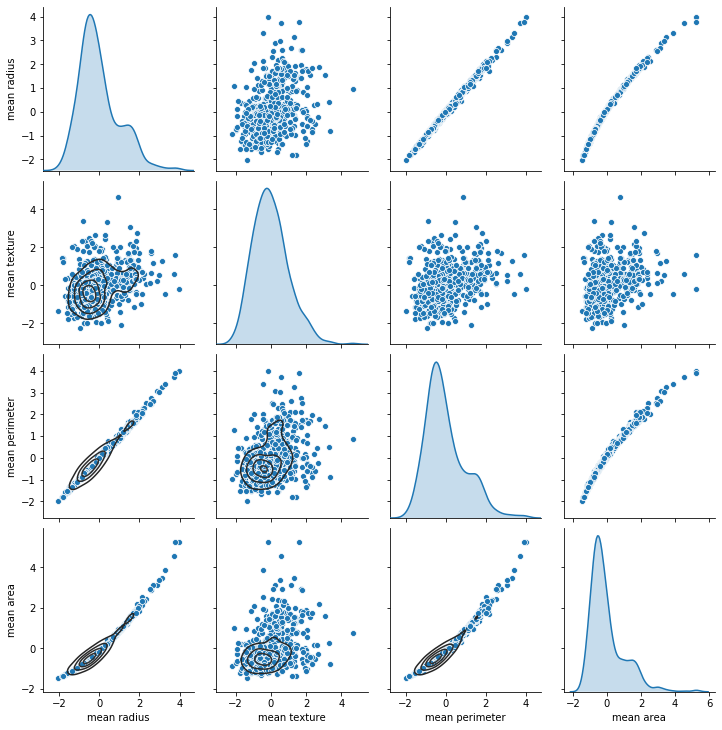

In [153]:
df = pd.DataFrame(X[:,:4], columns=cancer.feature_names[:4])
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")


La visualització que hem fet de les dades fa la normalització a efectes visuals però no l'aplica a les dades. Cal anar amb compte.

Si ara apliquem el classificador tornarem a tenir els rendiments i aquest cop no dependran del rang de les dades.

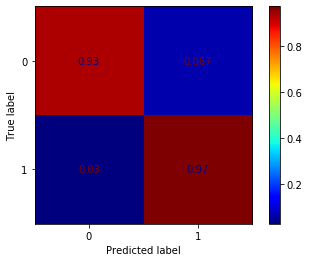

In [154]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='jet')

## Corbes ROC i PR

A partir de la matriu de confusió podem calcular les mètriques de rendiment que hem vist més amunt (Acc, Prec, Rec), que calculen com de bé o malament ho fa un classificador tenint en compte la classe per la que "ha apostat" amb un llindar específic (i.e. 0.5).

Ara volem visualitzar com es comporta aquest classificador si anem canviant el llindar (amb el que obtindríem una matriu de confusió diferent per cada llindar). Podem utilitzar les corbes ROC i Precision-Recall. 

Obtenim les probabilitats de classificació per a cada una de les categories (abans d'aplicar el llindar) i ens quedem amb les probabilitats només per a la classe 1. 


In [155]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

Recordem com es calcula la corba ROC i la Precision-Recall. Per cada valor del llindar, tindrem una matriu de confusió diferent. La ROC mostra la relació FPR (1-Specificity) vs TPR (Recall) i la PR mostra la relació Precision vs Recall.

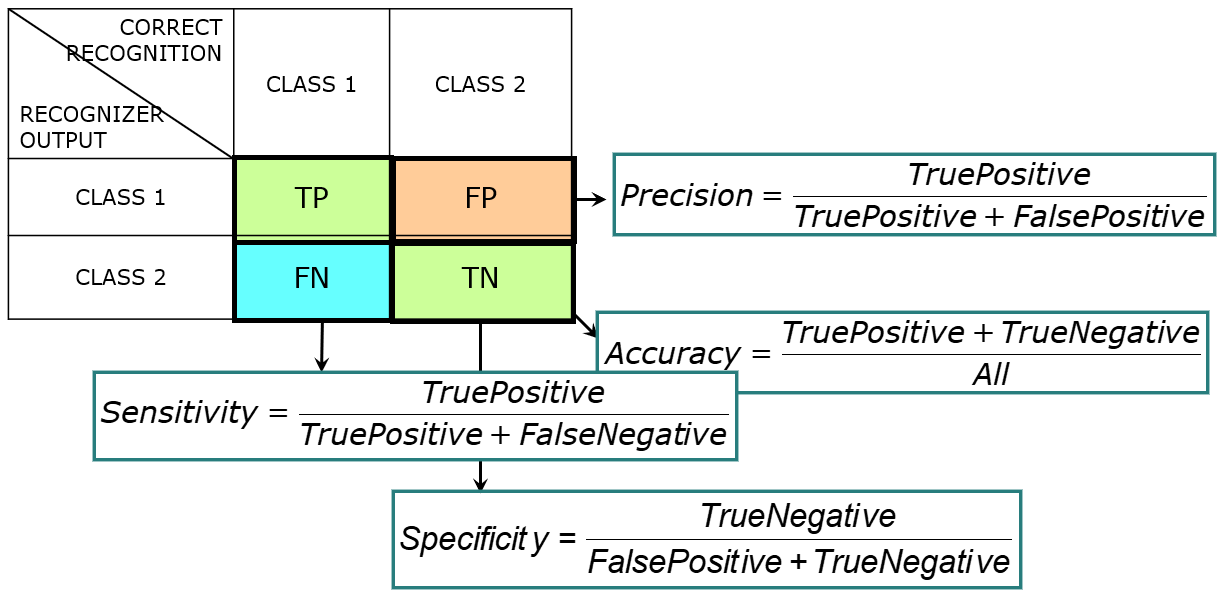

Classificador sense capacitat predictiva: ROC AUC=0.500
El nostre model: ROC AUC=0.994


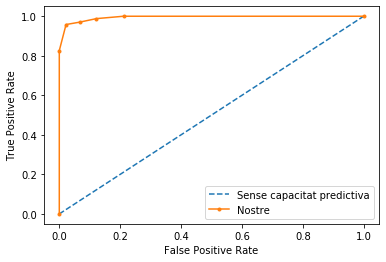

In [156]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Classificador sense capacitat predictiva: ROC AUC=%.3f' % (ns_auc))
print('El nostre model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Nostre')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Les corbes PR ens serveixen quan tenim un conjunt desbalancejat, sobretot quan tenim moltes mostres de la classe "no passa res"

El nostre model té una auc=0.997


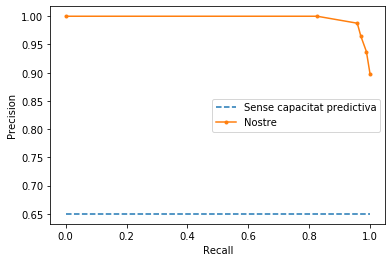

In [157]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_auc = auc(lr_recall, lr_precision)
# summarize score
print('El nostre model té una auc=%.3f' % (lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
plt.plot(lr_recall, lr_precision, marker='.', label='Nostre')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## k-fold Cross-validation

Fins ara hem partit el nostre conjunt de dades en un 55\% de train i un 45\% de test, però només l'hem trencat una sola vegada. La primera pregunta seria: hem estat de sort quan hem trencat el nostre conjunt? Com assegurem que la partició no és casualment l'òptima per al nostre paràmetre? O potser el paràmetre triat no és el millor? Com ho podem valorar?

Ens basarem en les tècniques de validació creuada que:

1. Separen les dades en k subconjunts d'igual (o similar) mida
2. Tria un subconjunt i entrena el model amb els altres k-1 subconjunts
3. Repeteix el procés k vegades fins que tots els subconjunts s'han utilitzat per testejar

Podem utilitzar la funció cross_validate.

In [158]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.96491228 0.95614035 0.98245614 0.95614035 0.96460177]


0.9648501785437045

 Quin és el paràmetre del knn que farà que el nostre model sigui òptim? Per fer-ho bé caldria deixar un percentatge de les dades com a test i fer el k-fold sobre el conjunt d'entrenament i així poder validar el nostre model. Per exemple, podem trencar el nostre conjunt de dades original en 80:20 i treballar el k-fold cross validation sobre aquest 80% de dades.

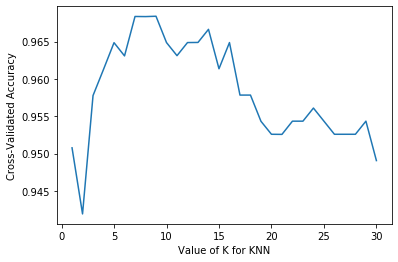

In [159]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to calculator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()